In [1]:
import OSMPythonTools
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import geopandas as gpd

In [2]:
data = pd.read_csv('311_Noise_Complaints_cleaned.csv')

In [3]:
data.columns

Index(['Unique Key', 'Created Date', 'Closed Date', 'Agency', 'Agency Name',
       'Complaint Type', 'Descriptor', 'Location Type', 'Incident Zip',
       'Incident Address', 'Street Name', 'Cross Street 1', 'Cross Street 2',
       'Intersection Street 1', 'Intersection Street 2', 'Address Type',
       'City', 'Landmark', 'Status', 'Resolution Description',
       'Resolution Action Updated Date', 'Community Board', 'Borough',
       'X Coordinate (State Plane)', 'Y Coordinate (State Plane)',
       'Park Facility Name', 'Park Borough', 'Latitude', 'Longitude',
       'Location'],
      dtype='object')

In [4]:
# check the unique values of the 'Agency', 'Street Name','Incident Zip' columns and print
print(data['Agency'].unique())
print(data['Street Name'].unique())
print(data['Incident Zip'].unique())
print(data['Address Type'].unique())

['NYPD' 'EDC' 'DEP' 'DSNY' '3-1-1']
[nan 'FDR DRIVE' 'GRANDVIEW AVENUE' ... 'STRAUS HOUSES' 'WEIR GREENHOUSE'
 'PIER    6']
[   nan 11365. 11207. 11206. 10461. 11385. 10016. 10034. 10032. 11215.
 10312. 10128. 10028. 10014. 10460. 11226. 10002. 10027. 11426. 11358.
 10453. 10459. 11201. 11211. 11105. 10456. 10025. 10022. 10306. 11214.
 11212. 11221. 10038. 11360. 10463. 10465. 11232. 11223. 10451. 10464.
 11377. 11225. 10033. 11229. 10040. 11228. 11374. 10452. 10029. 11379.
 11209. 11421. 11210. 10458. 11691. 10468. 11357. 11373. 11235. 10010.
 11237. 10472. 11230. 10013. 10462. 11238. 10009. 11370. 10473. 10026.
 10039. 10012. 11368. 11102. 10307. 11218. 11361. 10457. 11217. 10310.
 10454. 10031. 11104. 10467. 11103. 11423. 11231. 11220. 10003. 10024.
 11204. 10469. 11233. 10314. 10471. 10466. 11356. 11420. 11378. 11222.
 10075. 10470. 11419. 11219. 11375. 10011. 11249. 11213. 11224. 11414.
 10037. 11415. 11372. 10035. 10021. 11236. 11106. 11208. 10302. 11418.
 11692. 11205. 10455. 11

In [5]:
# check for the missing values in the 'Agency', 'Street Name','Incident Zip' , 'Latitude' and 'Longitude' and 'Location' columns
print(data['Agency'].isnull().sum())
print(data['Street Name'].isnull().sum())
print(data['Incident Zip'].isnull().sum())
print(data['Latitude'].isnull().sum())
print(data['Longitude'].isnull().sum())
print(data['Location'].isnull().sum())

0
22373
1569
16993
16993
16993


In [6]:
# fill the missing values in the 'Latitude' and 'Longitude' columns by using the groupby of the 'Incident Zip' column and fill the missing values with the mean of its group and leave the existing values as it is
data['Latitude'] = data.groupby('Incident Zip')['Latitude'].transform(lambda x: x.fillna(x.mean()))
data['Longitude'] = data.groupby('Incident Zip')['Longitude'].transform(lambda x: x.fillna(x.mean()))

# check for the missing values in the 'Latitude' and 'Longitude' columns
print(data['Latitude'].isnull().sum())
print(data['Longitude'].isnull().sum())


1569
1569


In [7]:
# drop the rows that the 'Latitude' and 'Longitude' columns are missing
data = data.dropna(subset=['Latitude', 'Longitude'])

# save the cleaned data to a new csv file
data.to_csv('311_Noise_Complaints_cleaned2.csv', index=False)


In [8]:
print(data['Complaint Type'].isnull().sum())

0


In [9]:
import folium
from folium.plugins import HeatMap

In [10]:
# 创建地图对象
map = folium.Map(location=[data['Latitude'].mean(), data['Longitude'].mean()], zoom_start=12)

# 创建热力图层
heat_data = [[row['Latitude'],row['Longitude']] for index, row in data.iterrows()]
HeatMap(heat_data).add_to(map)

In [11]:
map.save("heatmap.html")

In [13]:
# 获取不同的投诉类型
complaint_types = data['Complaint Type'].unique()

# 为每个噪声类型创建和保存一个热力图
for complaint in complaint_types:
    # 筛选当前类型的数据
    type_data = data[data['Complaint Type'] == complaint]
    
    # 如果类型数据不为空，创建地图
    if not type_data.empty:
        # 创建地图对象
        map = folium.Map(location=[data['Latitude'].mean(), data['Longitude'].mean()], zoom_start=12)
        
        # 添加热力图层
        heat_data = [[row['Latitude'], row['Longitude']] for index, row in type_data.iterrows()]
        HeatMap(heat_data).add_to(map)
        
        # 保存地图为HTML文件
        filename = f"heatmap_{complaint.replace('/', '_')}.html"  # 替换任何可能导致文件名错误的字符
        map.save(filename)

In [27]:
colors = plt.cm.get_cmap('nipy_spectral', len(complaint_types))

# 为每个噪声类型添加热力图层
for idx, complaint in enumerate(complaint_types):
    # 筛选当前类型的数据
    type_data = data[data['Complaint Type'] == complaint]
    
    # 创建热力图数据
    heat_data = [[row['Latitude'], row['Longitude']] for index, row in type_data.iterrows()]
    
    # 添加热力图层，使用指定颜色
    HeatMap(heat_data, radius=15, gradient={0.2: '#ffffff00', 0.5: colors(idx)[:3], 1: colors(idx)[:3]}, blur=15).add_to(map)

# 保存地图为HTML文件
map.save('combined_heatmap.html')

C:\Users\20123\AppData\Local\Temp\ipykernel_28504\1393628339.py:7: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  colors = plt.cm.get_cmap('nipy_spectral', len(complaint_types))


In [30]:
# 初始化地图
map = folium.Map(location=[data['Latitude'].mean(), data['Longitude'].mean()], zoom_start=12)

# 分别处理每种噪声类型
for complaint_type in data['Complaint Type'].unique():
    # 筛选特定类型的数据
    subset = data[data['Complaint Type'] == complaint_type]
    
    # 生成热力图数据
    heat_data = [[row['Latitude'], row['Longitude']] for index, row in subset.iterrows()]
    
    # 创建热力图层
    heat_layer = HeatMap(heat_data, radius=15, blur=15, max_zoom=1)
    
    # 创建FeatureGroup，并添加到地图
    fg = folium.FeatureGroup(name=complaint_type)
    fg.add_child(heat_layer)
    map.add_child(fg)

# 添加图层控制器
folium.LayerControl().add_to(map)

# 保存并显示地图
map.save('interactive_heatmap.html')

In [12]:
data['Descriptor']

95                 Loud Music/Party
121                Loud Music/Party
123                    Loud Talking
125                Loud Music/Party
127                Loud Music/Party
                     ...           
3495809    Noise, Barking Dog (NR5)
3495810    Noise, Barking Dog (NR5)
3495811    Noise, Barking Dog (NR5)
3495813                       Other
3495814                Loud Talking
Name: Descriptor, Length: 3494246, dtype: object

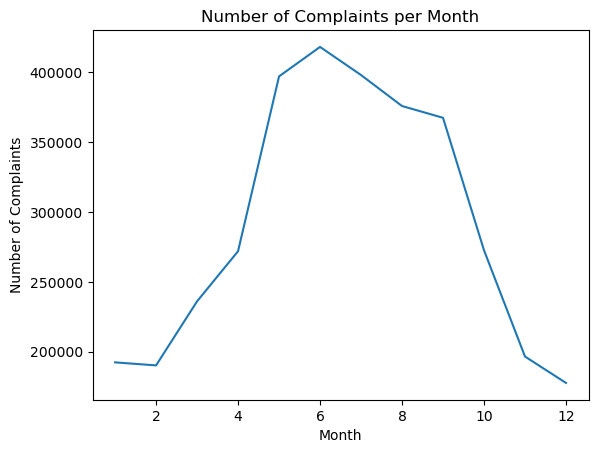

In [13]:
# plot the accumulated number of complaints for each month using plot not bar plot
# plt.figure(figsize=(10, 6))
data['Created Date'] = pd.to_datetime(data['Created Date'])
data['Created Date'].dt.month.value_counts().sort_index().plot()
plt.xlabel('Month')
plt.ylabel('Number of Complaints')
plt.title('Number of Complaints per Month')
plt.show()



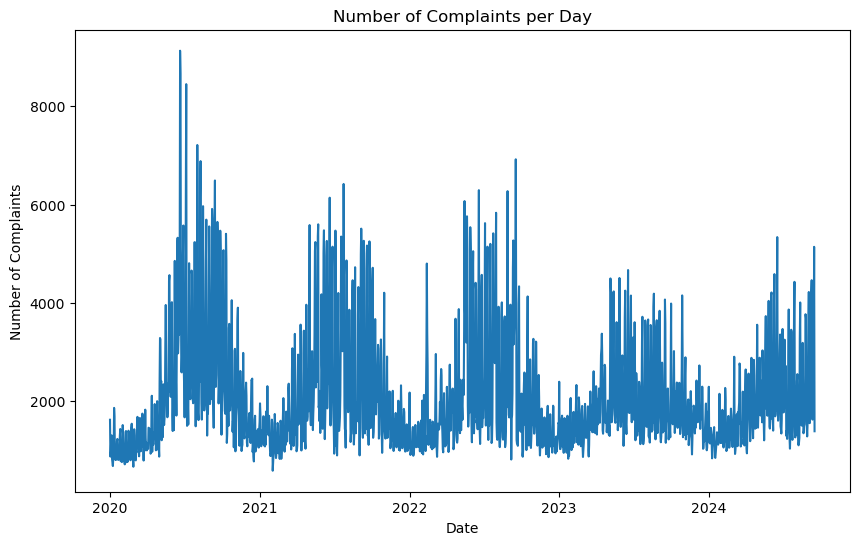

In [14]:
# plot the whole trend
plt.figure(figsize=(10, 6))
data['Created Date'].dt.date.value_counts().sort_index().plot()
plt.xlabel('Date')
plt.ylabel('Number of Complaints')
plt.title('Number of Complaints per Day')
plt.show()

In [15]:
# plot the complaints for each type in the same plot with different colors and the x is the date
import plotly.express as px

# Ensure Created Date is in datetime format and group by date and complaint type
data.loc[:, 'Created Date'] = pd.to_datetime(data['Created Date']).dt.date


# Group the data by 'Created Date' and 'Complaint Type', counting the occurrences
complaint_data = data.groupby(['Created Date', 'Complaint Type']).size().unstack()

# Create the interactive line plot using plotly.express
fig = px.line(complaint_data, 
              x=complaint_data.index, 
              y=complaint_data.columns,
              labels={'value': 'Number of Complaints', 'index': 'Date'},
              title='Number of Complaints per Day')

# Customize the layout for better display
fig.update_layout(xaxis_title='Date', yaxis_title='Number of Complaints')

# Show the plot
fig.show()


In [16]:
# Convert 'Created Date' to datetime and then to monthly period
data.loc[:, 'Created Date'] = pd.to_datetime(data['Created Date']).dt.to_period('M')

# Group the data by 'Created Date' (monthly) and 'Complaint Type', counting the occurrences
complaint_data = data.groupby(['Created Date', 'Complaint Type']).size().unstack()

# Create the interactive line plot using plotly.express
fig = px.line(complaint_data, 
              x=complaint_data.index.astype(str),  # Convert monthly period to string for better x-axis labels
              y=complaint_data.columns,
              labels={'value': 'Number of Complaints', 'index': 'Month'},
              title='Number of Complaints per Month')

# Customize the layout for better display
fig.update_layout(xaxis_title='Month', yaxis_title='Number of Complaints')

# Show the plot
fig.show()

C:\Users\20123\AppData\Local\Temp\ipykernel_131592\3771044322.py:2: FutureWarning:

Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '<PeriodArray>
['2020-04', '2020-04', '2020-04', '2020-04', '2020-04', '2020-04', '2020-04',
 '2020-01', '2020-01', '2020-01',
 ...
 '2023-12', '2023-12', '2023-12', '2023-12', '2022-08', '2024-04', '2024-04',
 '2023-07', '2023-08', '2023-08']
Length: 3494246, dtype: period[M]' has dtype incompatible with datetime64[ns], please explicitly cast to a compatible dtype first.

